In [55]:
import numpy as np
import cv2      # cv2 install bản 3.x
import matplotlib.pyplot as plt

## **Đọc ảnh** 
### cv2.imread(filename, [flags])
Có 3 flags cho hàm này:
- **IMREAD_COLOR**: giải mã ảnh theo thứ tự BGR (8bit) - default
- **IMREAD_UNCHANGED**: tải hình ảnh nguyên trạng (giống COLOR, nhưng có thêm kênh alpha (nếu có))
- **IMREAD_GRAYSCALE**: tải hình ảnh dưới dạng cường độ xám

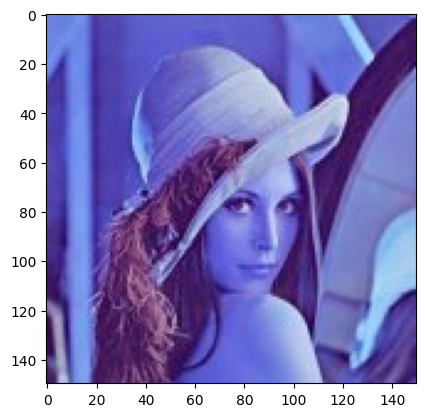

In [56]:
# với tham số là IMREAD_COLOR, ảnh sẽ được gải mã theo thứ tự B G R
img = cv2.imread('Lenna.jpg',  cv2.IMREAD_COLOR)
if(img is None):
    print('Could not read the img')
else: 
    # dẫn đến cho ra hình ảnh bị sai màu
    plt.imshow(img)  
    # cv2.imwrite('myImg.jpg', img)

## **Thay đổi thứ tự của ảnh**
### **Sử dụng hàm cv2.cvtColor(img, cv2.COLOR_BGR2RGB)**<br>
<br>*Khi đọc ảnh bằng OpenCV, ảnh sẽ được tải theo thứ tự BGR. Tuy nhiên, để sử dụng pillow, ảnh cần được lưu dưới dạng RGB --> cần phải convert lại thứ tự*
<br>
### **Cần lưu ý về thứ tự ảnh**
- Nếu dùng OpenCV để lưu ảnh, (bằng *imwrite*), ảnh cần được ở thứ tự B-G-R
- Còn nếu dùng plt,np để lưu ảnh (*Image.fromarray().save*), ảnh cần được ở thứ tự R-G-B 

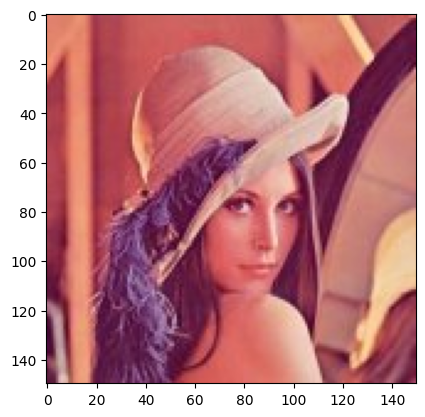

In [57]:
# sử dụng hàm cvtColor với tham số COLOR_BGR2RGB để chuyển đổi thứ tự
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [58]:
# thông tin bức ảnh với w x h x c
img.shape

(150, 150, 3)

## Vẽ lên ảnh
- **Line**: cv2.line(img, start, end, color, thickness) 
<br> *Cần xác định điểm đầu và cuối* 

- **Rectangle**: cv2.rectangle(img, top-left, bottom-right, color, thickness)
<br>*Cần xác định điểm trái trên và phải dưới*
- **Circle**: cv2.circle(img, center-coordinate, radius, color, thickness )
<br>*Cần xác định điểm giữa (là tâm) và bán kính*
<br>*Với thickness = -1: hình tròn sẽ đc lấp đầy*

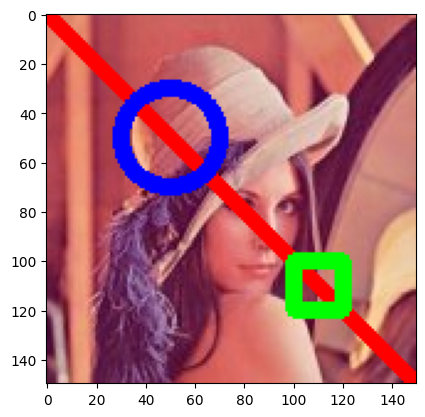

In [59]:
# vẽ đường, đoạn, hình tròn lên ảnh
# line nhận 4 tham số: img, điểm bắt đầu, điểm kết thúc, màu, độ dày đường
cv2.line(img, (0,0), (150,150), (255,0,0), 5)
cv2.rectangle(img, (100, 100), (120,120), (0,255,0), 5)
cv2.circle(img, (50,50), 20, (0,0,255), 5)

plt.imshow(img)

Color of pixel [col, row]:  [255   0   0]


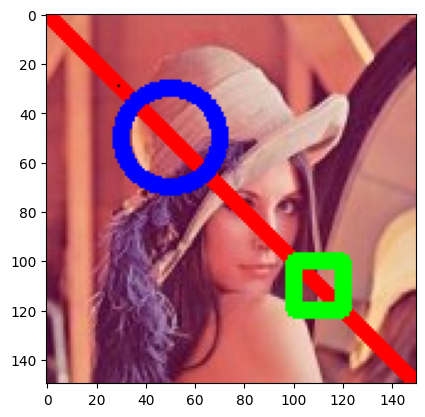

In [60]:
print('Color of pixel [col, row]: ', img[29,29])
# thay đổi giá trị màu tại một vị trí
img[29,29] = (0,0,0)
plt.imshow(img)

## Edge Detection
### Toán tử Sobel

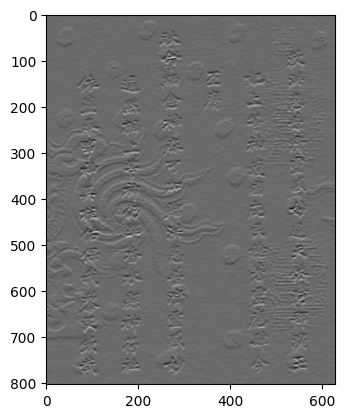

In [69]:
img_gray = cv2.imread('sample_1.jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # đạo hàm bậc 1 theo x
dy = 0  # không đạo hàm theo y
sobelx = cv2.Sobel(img_gray, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

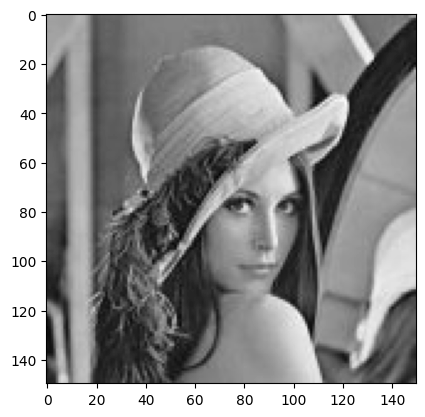

In [66]:
img_gray = cv2.imread('Lenna.jpg',  cv2.IMREAD_GRAYSCALE)
plt.imshow(img_gray, cmap='gray')

# feature detection - SIFT feature
# đọc lý thuyết tại https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)
img_sift = cv2.drawKeypoints(img_gray, keypoints, None)
plt.imshow(img_sift)

In [63]:
print(cv2.__version__)

3.4.8
